### Polymer Profiles


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
import scienceplots


Import custom plotting and data manipulation functions to create DISCO plots.

In [3]:
from utils.wrangle_data import generate_disco_effect_mean_diff_df, generate_subset_sattime_df 
from utils.plotting import add_fingerprint_toax, add_buildup_toax, add_difference_plot_transposed, add_overlaid_buildup_toax_customlabels, add_difference_plot
from utils.plotting_helpers import assemble_peak_buildup_df


e:\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
e:\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
# Define a custom output directory for formal figures
output_directory = "../paper/figurefiles_final"


Set global figure properties as desired. The colour palette in this work was selected from the Color Brewer qualitative contrast scheme. 

For more information on colour brewer see: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9

In [5]:
from matplotlib.ticker import FormatStrFormatter # set decimal places

plt.style.use(['science', 'discolib'])
plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.size': 10})


### PVA Interaction Profiles (Figure 1)

In [6]:
# grab data
low_PVA = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA86-89_105k_20uM.xlsx",
                        index_col=[0], header=[0]).reset_index(drop=True)
low_PVA_AFo = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA86-89_105k_20uM.xlsx",
                            index_col=[0], header=[0]).reset_index(drop=True)
# low_PVA_mean = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA86-89_105k_20uM.xlsx",
#  index_col=[0,1,2,3], header=[0,1]).reset_index()

high_PVA = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA99_105k_20uM.xlsx",
                         index_col=[0], header=[0]).reset_index(drop=True)
high_PVA_AFo = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA99_105k_20uM.xlsx",
                             index_col=[0], header=[0]).reset_index(drop=True)
# high_PVA_mean = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA99_105k_20uM.xlsx",
#  index_col=[0,1,2,3], header=[0,1]).reset_index()

# read and prep PVA Au NP Data
low_PVA_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA8789AuNP_105k_14.35uM.xlsx",
                           index_col=[0], header=[0]).reset_index(drop=True)
low_PVA_AFo_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA8789AuNP_105k_14.35uM.xlsx",
                               index_col=[0], header=[0]).reset_index(drop=True)
# low_PVA_mean_NP = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA8789AuNP_105k_20uM.xlsx",
#  index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

high_PVA_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA99AuNP_105k_14.35uM.xlsx",
                            index_col=[0], header=[0]).reset_index(drop=True)
high_PVA_AFo_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA99AuNP_105k_14.35uM.xlsx",
                                index_col=[0], header=[0]).reset_index(drop=True)
# high_PVA_mean_NP = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA99AuNP_105k_20uM.xlsx",
#   index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()


In [7]:
# add zero data to 86-69 NPs to enable plotting its fingeprint
low_PVA_AFo_NP = low_PVA_NP.copy()
low_PVA_AFo_NP['AFo'] = 0

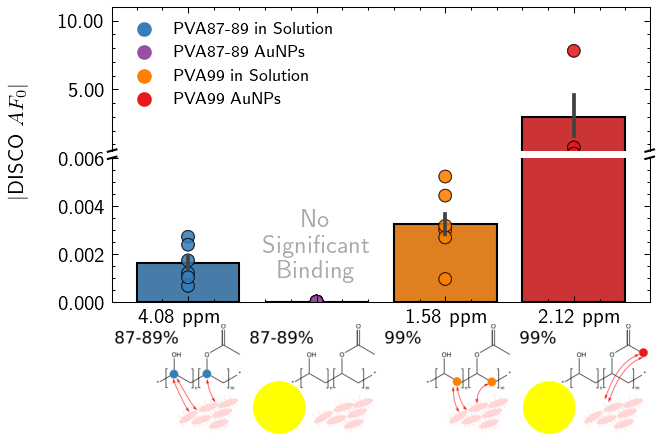

In [19]:
mosaic = """
    AAAA
    BBBB
    CDEF
    """
gs_kw = dict(width_ratios=[1,1,1,1], height_ratios=[1,1,1])
# gs_kw = dict(width_ratios = [1,0.05,1], height_ratios = [2,1,1,1,1,1,1,1,1])

PVA_interaction_df = pd.concat([low_PVA_AFo, low_PVA_AFo_NP, high_PVA_AFo, high_PVA_AFo_NP])
PVA_interaction_df['AFo'] = PVA_interaction_df['AFo'].abs()

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(4, 3),
                              constrained_layout=False, dpi=150)

# fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# Overlay fingerprints
sns.barplot(data = PVA_interaction_df, y = "AFo", x = "polymer_name", ax = axd['A'], edgecolor='k')
sns.barplot(data = PVA_interaction_df, y = "AFo", x = "polymer_name", ax = axd['B'], edgecolor='k')
sns.scatterplot(data=PVA_interaction_df, y="AFo", x="polymer_name", ax=axd['A'], hue = 'polymer_name', edgecolor='k', alpha = 0.25, legend = False)
sns.scatterplot(data=PVA_interaction_df, y="AFo", x="polymer_name", ax=axd['B'], hue = 'polymer_name', edgecolor='k', alpha = 0.25)

#axd['B'].yaxis.set_ticks(np.arange(0.0, 0.0006, 0.0002))

axd['A'].set_ylim(0.55, 11)  # outliers only
axd['B'].set_ylim(0, 0.006)  # most of the data
axd['A'].tick_params(labelsize=10)
axd['B'].tick_params(labelsize=10)

axd['A'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))
axd['B'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.3f'))




 
# remove default axis labels
fig.text(-0.08, 0.7, '$$|\mbox{DISCO $AF_0$}|$$', va='center', rotation='vertical',font = 'OpenSans',fontsize=10)
axd['A'].set_ylabel("") 
axd['B'].set_ylabel("")
axd['A'].set_xlabel("")
axd['B'].set_xlabel("")
axd['B'].set_xticklabels("")

# customize legend
new_labels = ['PVA87-89 in Solution', 'PVA87-89 AuNPs', 'PVA99 in Solution', 'PVA99 AuNPs']
handles, labels = axd['B'].get_legend_handles_labels()
axd['A'].legend(handles = handles, labels = new_labels, loc = 'upper left', fontsize = 8)
axd['B'].get_legend().remove()
# axd['A'].get_legend().remove()

# legend(default_labels, ['PVA86-89 in Solution', 'PVA99 in Solution', 'PVA99 AuNPs'], loc = 'upper left')

# hide the spines between ax and ax2
axd['A'].spines['bottom'].set_visible(False)
axd['B'].spines['top'].set_visible(False)
axd['A'].xaxis.tick_top()
axd['A'].tick_params(labeltop=False)  # don't put tick labels at the top
axd['B'].xaxis.tick_bottom()

d = .008  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axd['A'].transAxes, color='k', clip_on=False)
axd['A'].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axd['A'].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axd['B'].transAxes)  # switch to the bottom axes
axd['B'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axd['B'].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# add PVA Structure
pva_structure = plt.imread("../data/external/pva_repeatunit-v2.png", format="png")
axd['C'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_low_sol-v2.png", format="png"))
axd['C'].axis('off')
# axd['C'].xaxis.set_visible(False)
# axd['C'].yaxis.set_visible(False)
# axd['C'].set_xlabel("Poly(vinyl alcohol)")
axd['D'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_low_np-v2.png", format="png"))
axd['D'].axis('off')
# axd['D'].xaxis.set_visible(False)
# axd['D'].yaxis.set_visible(False)
axd['E'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_high_sol-v2.png", format="png"))
axd['E'].axis('off')
# axd['E'].xaxis.set_visible(False)
# axd['E'].yaxis.set_visible(False)
axd['F'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_high_np-v2.png", format="png"))
axd['F'].axis('off')
# axd['F'].xaxis.set_visible(False)
# axd['F'].yaxis.set_visible(False)

fig.text(0.138, 0.305, "4.08 ppm", va='center', fontsize = 10)
fig.text(0.585, 0.305, "1.58 ppm", va='center', fontsize = 10)
fig.text(0.805, 0.305, "2.12 ppm", va='center', fontsize = 10)

axd['B'].annotate(text = 'No \n Significant \n Binding', xy=[1,0.001], color="darkgrey", 
                  ha='center', fontsize = 12)

output_filename = f"{output_directory}/PVA_NP_interactions_overlaid.png"
output_filename_svg = f"{output_directory}/PVA_NP_interactions_overlaid.svg"
fig.patch.set_facecolor('white')
plt.tight_layout(pad=0.1)
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename_svg, dpi=500, transparent=False)


$${\Delta DISCO Effect}_{Polymer, peak, t} = {DISCO Effect}_{Polymer 2, peak, t} - {DISCO Effect}_{Polymer1, peak, t}

### Solution State and NP PVA Summary Profile (Figure 2)

In [8]:
print("PVA AuNP Results:")
pva_np_effect_size_df = generate_disco_effect_mean_diff_df(low_PVA_NP, high_PVA_NP)
pva_np_subset_sattime_df = generate_subset_sattime_df(pva_np_effect_size_df, 1)

pva_effect_size_df = generate_disco_effect_mean_diff_df(low_PVA, high_PVA)
pva_subset_sattime_df = generate_subset_sattime_df(pva_effect_size_df, 1)


PVA AuNP Results:
Sig Point is: 0.25, 2.11805, p = 0.0006265394630837544, n = 3
Sig Point is: 0.5, 2.11805, p = 0.030825282293130342, n = 3
Sig Point is: 0.75, 2.11805, p = 0.0029371710732866594, n = 3
Sig Point is: 1.0, 2.11805, p = 0.00149762330772603, n = 3
Sig Point is: 1.25, 4.07685, p = 0.043258249229537284, n = 3
Sig Point is: 1.25, 2.11805, p = 0.000802163959782993, n = 3
Sig Point is: 1.5, 2.11805, p = 0.009150095194577141, n = 3
Sig Point is: 1.75, 2.11805, p = 0.015931037072297007, n = 3
Sig Point is: 0.25, 2.11805, p = 0.014926765405931294, n = 6
Sig Point is: 1.0, 2.11805, p = 0.0112871293422101, n = 6
Sig Point is: 1.25, 2.11805, p = 0.011975924552947735, n = 6
Sig Point is: 1.5, 2.11805, p = 0.0457053590596894, n = 6
Sig Point is: 1.75, 2.11805, p = 0.02421149237920883, n = 6


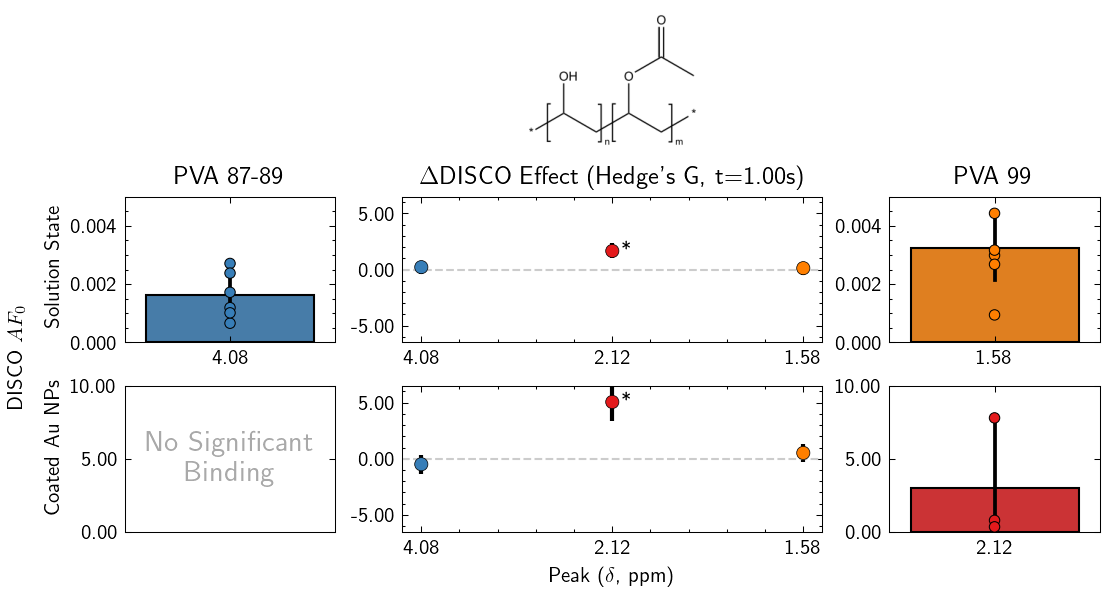

In [9]:
mosaic = '''
.A.
BCD
EFG
'''

gs_kw = dict(width_ratios=[1.25, 2.5, 1.25], height_ratios=[4, 4, 4])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7, 4),
                              constrained_layout=False, dpi=150)

ppm_colors = ['#377eb8', '#e41a1c', '#ff7f00', '#984ea3', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999'] #update ppm colors to match previous graph (flip #984ea3 and #e41a1c)

              # low vs high per ppm
buildup_colors9 = ['#f2f2f2',  '#999999']
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

# Structure Axis, all peaks id'd
axd['A'].imshow(pva_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)

# SOLUTION STATE ------
# add Low Fingerprint
kwargs = {"custom_palette": ["#377eb8"]}
add_fingerprint_toax(low_PVA_AFo, axd['B'], **kwargs)
axd['B'].set_ylim(0.0, 0.005)
axd['B'].set_ylabel(" ")
axd['B'].set_title("PVA 87-89")
axd['B'].set_xlabel(" ")

# add solution state change fingerprint
add_difference_plot_transposed(df=pva_subset_sattime_df, ax=axd['C'], dy=0.1, **{"custom_colors": ppm_colors})
axd["C"].set_title("$\Delta$DISCO Effect (Hedge's G, t=1.00s)")
axd["C"].set_ylim(-6.5, 6.5)

# add high binding fingerprint
kwargs = {"custom_palette": ['#ff7f00']}
add_fingerprint_toax(high_PVA_AFo, axd['D'], **kwargs)
axd['D'].set_ylim(0.0, 0.005)
axd['D'].set_title("PVA 99")
axd['D'].set_ylabel(" ")  # Absolute DISCO $AF_0$
axd['D'].set_xlabel(" ")

# NP STATE ------
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

# add low binding fingerprint
kwargs = {"custom_palette": ["#377eb8"]}
annotate_axes(axd['E'], "No Significant\nBinding", fontsize = 14)
axd['E'].set_ylim(0.0, 10)
axd['E'].set_yticks(axd['E'].get_yticks(), minor=True)
axd['E'].set_xlabel("Peak ($\delta$, ppm)")
axd['E'].xaxis.set_visible(False)

# add NP change fingerprint
add_difference_plot_transposed(df=pva_np_subset_sattime_df, ax=axd['F'], dy=0.1, **{"custom_colors": ppm_colors})
axd["F"].set_xlabel("Peak ($\delta$, ppm)")
axd["F"].set_ylim(-6.5, 6.5)

# add High Fingerprint
kwargs = {"custom_palette": ['#e41a1c']}
add_fingerprint_toax(high_PVA_AFo_NP, axd['G'], **kwargs)
axd['G'].set_ylim(0.0, 10)
axd['G'].set_yticks(axd['G'].get_yticks(), minor = True)
axd['G'].set_ylabel(" ")
axd['G'].set_xlabel(" ")


fig.text(-0.05, 0.40, 'DISCO $AF_0$', va='center', rotation=90)
fig.text(-0.015, 0.55, 'Solution State', va='center', rotation=90, fontsize = 10)
fig.text(-0.015, 0.25, 'Coated Au NPs', va='center', rotation=90, fontsize = 10)

for axes in axd:
    if axes == 'B' or axes =='D':
        axd[axes].yaxis.set_major_formatter(mt.FormatStrFormatter('%.3f'))
    else:
        axd[axes].yaxis.set_major_formatter(mt.FormatStrFormatter('%.2f'))

output_filename = f"{output_directory}/PVA_change_fig.png"
output_filename2 = f"{output_directory}/PVA_change_fig.svg"
fig.patch.set_facecolor('white')
plt.tight_layout(pad=0.5)
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)


### PVA 99 solution to NP effect Profile (Figure 3)

In [10]:
print("PVA AuNP Results:")
pva_np_effect_size_df = generate_disco_effect_mean_diff_df(high_PVA, high_PVA_NP)
pva_np_subset_sattime_df = generate_subset_sattime_df(pva_np_effect_size_df, 1)

PVA AuNP Results:
Sig Point is: 0.25, 4.07685, p = 9.270277304888915e-06, n = 6
Sig Point is: 0.25, 1.58145, p = 0.0023653725287334664, n = 6
Sig Point is: 0.75, 4.07685, p = 0.00020462526727115115, n = 6
Sig Point is: 0.75, 2.11805, p = 0.0017344253371808739, n = 6
Sig Point is: 0.75, 1.58145, p = 0.016008612188189567, n = 6
Sig Point is: 1.0, 4.07685, p = 1.6921171822560574e-05, n = 6
Sig Point is: 1.0, 2.11805, p = 0.01355744669703078, n = 6
Sig Point is: 1.0, 1.58145, p = 0.0006158733128532663, n = 6
Sig Point is: 1.25, 4.07685, p = 0.001021747641780112, n = 6
Sig Point is: 1.25, 2.11805, p = 0.019325000752794076, n = 6
Sig Point is: 1.5, 4.07685, p = 0.00044924259087842944, n = 6
Sig Point is: 1.5, 2.11805, p = 0.018048145575217594, n = 6
Sig Point is: 1.5, 1.58145, p = 0.02049581526721515, n = 6
Sig Point is: 1.75, 4.07685, p = 0.001885267659012741, n = 6
Sig Point is: 1.75, 2.11805, p = 0.009056713617839725, n = 6
Sig Point is: 1.75, 1.58145, p = 0.04325810617043423, n = 6


In [11]:
ppi_1_high = assemble_peak_buildup_df(high_PVA, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVA, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVA, 3)

ppi_1_high_np = assemble_peak_buildup_df(high_PVA_NP, 1)
ppi_2_high_np = assemble_peak_buildup_df(high_PVA_NP, 2)
ppi_3_high_np = assemble_peak_buildup_df(high_PVA_NP, 3)

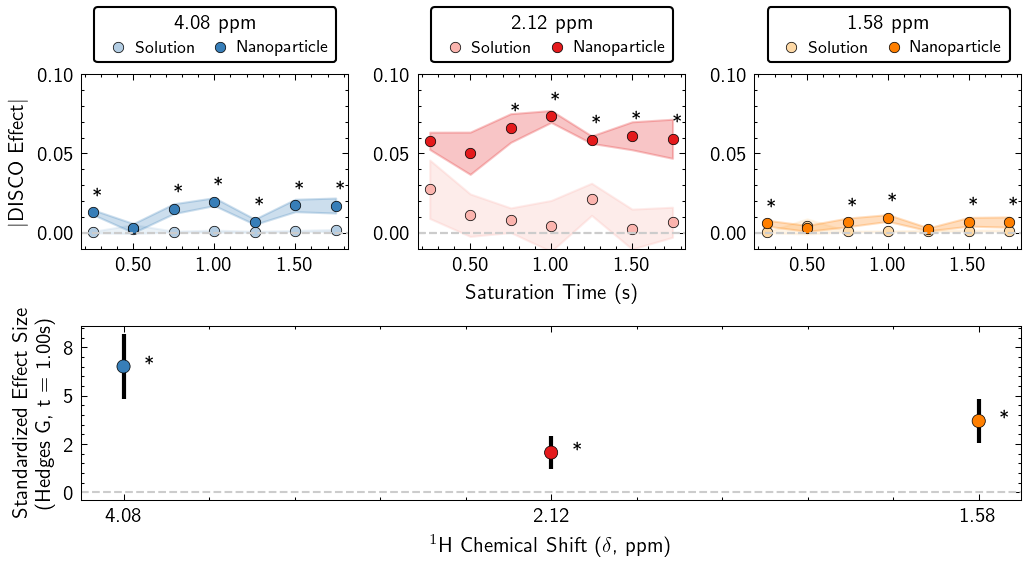

In [12]:
mosaic = """
    ...
    EDC
    QQQ
    ...
    """
# always ensure low to high order for correct labelling
pva_names = ["87-89", "99"]
ppm_colors = ['#377eb8', '#e41a1c', '#ff7f00', '#984ea3', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999'] #update ppm colors to match previous graph (flip #984ea3 and #e41a1c)

              # low vs high per ppm
buildup_colors9 = ['#f2f2f2',  '#999999']
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

gs_kw = dict(height_ratios = [0.35,1.0,1.0, 0.5], width_ratios = [1,1,1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7,5),
                              constrained_layout=False, dpi = 150)

pva_structure = plt.imread("../data/external/pva_repeatunit-v2.png", format = "png")

pva_names = ["Solution", "Nanoparticle"] # always ensure low to high order for correct labelling
legend_title = "PVA Coating Effect"
kwargs = {"labels":pva_names,
          "legend_title":legend_title,
          "dx":0.00,
          "dy":0.01,
          "ppm_colors": ppm_colors,
          "change_significance":pva_np_effect_size_df,
          "annot_color":"#000000"} 


# add overlaid buildup curve for just 1.58
df_list = [ppi_3_high, ppi_3_high_np]
add_overlaid_buildup_toax_customlabels(df_list, axd['C'], **kwargs, **{"custom_colors": buildup_colors3})
axd['C'].legend(title = "1.58 ppm",bbox_to_anchor=(0.02, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5, handletextpad=0.005, fontsize=8, columnspacing=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)

axd['C'].set_ylim((-0.01, 0.1))
axd['C'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))
axd['C'].xaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))

# add buildup curve subtraction just for 2.12 peak
df_list = [ppi_2_high, ppi_2_high_np]
add_overlaid_buildup_toax_customlabels(df_list, axd['D'], **kwargs, **{"custom_colors": buildup_colors4})
# axd['E'].set_ylabel("Absolute DISCO Effect")
axd['D'].legend(title="2.12 ppm", bbox_to_anchor=(0.02, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5, handletextpad=0.005, fontsize=8, columnspacing=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)
axd['D'].set_ylim((-0.01,0.1))
axd['D'].set_xlabel ("Saturation Time (s)")
axd['D'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))
axd['D'].xaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))

# add overlaid buildup curves for just 4.08
df_list = [ppi_1_high, ppi_1_high_np]
add_overlaid_buildup_toax_customlabels(df_list, axd['E'], **kwargs, **{"custom_colors": buildup_colors1})
# axd['E'].legend(loc = "upper right")
axd['E'].legend(title = "4.08 ppm", bbox_to_anchor=(0.02, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5, handletextpad=0.005, fontsize=8, columnspacing=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)
axd['E'].set_ylim((-0.01, 0.1))
axd['E'].set_ylabel("$$|\mbox{DISCO Effect}|$$")
axd['E'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))
axd['E'].xaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))

add_difference_plot_transposed(df=pva_np_subset_sattime_df,ax=axd['Q'], dy=0.1, **{"custom_colors": ppm_colors})
#axd["Q"].set_title("Change in PVA DISCO Effect from Solution State to Nanoparticle Coating")
axd["Q"].set_ylabel("Standardized Effect Size \n(Hedges G, t = 1.00s)")
axd["Q"].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)")
axd['Q'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.f'))

output_filename = f"{output_directory}/PVA_99_to_NP_changefigure_transposed.png"
output_filename2 = f"{output_directory}/PVA_99_to_NP_changefigure_transposed.svg"
fig.patch.set_facecolor('white')
plt.tight_layout(pad = 0.5)
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)

### PVP NP fingerprints and buildup (Figure 4)

In [13]:
# grab data
PVP55_NP_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_AuNP-PVP_55k_33.64uM.xlsx",
                          index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
PVP55_NP_mean_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_mean_AuNP-PVP_55k_33.64uM.xlsx",
                          index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
PVP55_NP_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_AuNP-PVP_55k_33.64uM.xlsx",
                          index_col=[0], header=[0]).reset_index(drop=True)
PVP55_NP_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_AuNP-PVP_55k_33.64uM.xlsx",
                          index_col=[0], header=[0]).reset_index(drop=True)

PVP1300_NP_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_AuNP-PVP_1300k_1.42uM.xlsx",
                          index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
PVP1300_NP_mean_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_mean_AuNP-PVP_1300k_1.42uM.xlsx",
                          index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
PVP1300_NP_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_AuNP-PVP_1300k_1.42uM.xlsx",
                          index_col=[0], header=[0]).reset_index(drop=True)
PVP1300_NP_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_AuNP-PVP_1300k_1.42uM.xlsx",
                          index_col=[0], header=[0]).reset_index(drop=True)

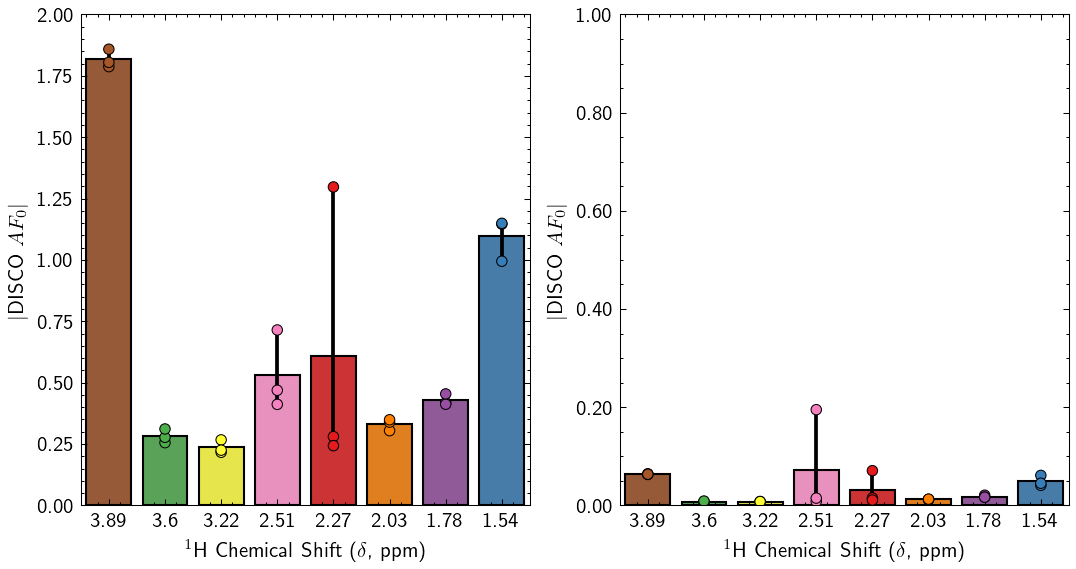

In [14]:
mosaic = """
    CD
    """

gs_kw = dict(width_ratios=[0.5, 0.5], height_ratios=[0.5])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(8.5, 4.25),
                              constrained_layout=False, dpi=150)




add_fingerprint_toax(PVP55_NP_replicate_bindingonly, axd['C'])
axd['C'].set_ylabel("$$|\mbox{DISCO $AF_0$}|$$")
axd['C'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)")
axd['C'].set_ylim([0,2])
axd['C'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))




add_fingerprint_toax(PVP1300_NP_replicate_bindingonly, axd['D'])
axd['D'].set_ylabel("$$|\mbox{DISCO $AF_0$}|$$")
axd['D'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)")
axd['D'].set_ylim([0,1])
axd['D'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# save as png
output_filename = f"{output_directory}/PVPAuNP-55k-and-1300k-fingerprints.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as svg
output_filename = f"{output_directory}/PVPAuNP-55k-and-1300k-fingerprints.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

### PEG Profiles (Figure 5)

In [15]:
peg_20k_path = "../data/raw/stats_analysis_output_mean_all_PEG_20k_20uM.xlsx"  # n = 3
peg_20k_df = pd.read_excel(peg_20k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
peg_10k_path = "../data/raw/stats_analysis_output_mean_all_PEG_10k_20uM.xlsx"  # n = 3
peg_10k_df = pd.read_excel(peg_10k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
peg_2k_path = "../data/raw/stats_analysis_output_mean_all_PEG_2k_20uM.xlsx"  # n = 3
peg_2k_df = pd.read_excel(peg_2k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

coohpeg_path = "../data/raw/stats_analysis_output_mean_all_PLGAPEG_20k_75uM.xlsx"  # n = 3
coohpeg_df = pd.read_excel(coohpeg_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
mpeg_path = "../data/raw/stats_analysis_output_mean_all_PLGAMPEG_20k_75uM.xlsx"  # n = 3
mpeg_df = pd.read_excel(mpeg_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

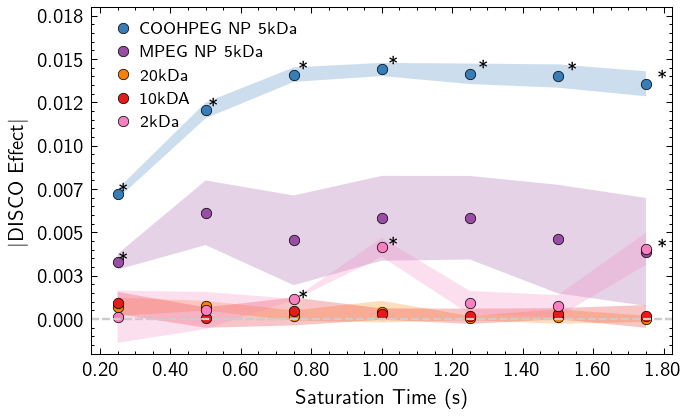

In [16]:
mosaic = '''
A
'''

gs_kw = dict(width_ratios=[1], height_ratios=[1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 3),
                              constrained_layout=False, dpi=150)


label= ["COOHPEG NP 5kDa", "MPEG NP 5kDa","20kDa", "10kDA", "2kDa"]

np_list = [coohpeg_df.abs(), mpeg_df.abs(),peg_20k_df.abs(), peg_10k_df.abs(), peg_2k_df.abs()]

for i,nanoparticle_df in enumerate(np_list):
    add_buildup_toax(nanoparticle_df, ax = axd['A'], labels=label[i])

axd['A'].set_xlabel("Saturation Time (s)")
axd['A'].set_ylabel("$$|\mbox{DISCO Effect}|$$")

axd['A'].set_ylim([-0.002,0.018])

axd['A'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['A'].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

for nps in np_list:
    
    for j, sig in enumerate(nps['significance']['Unnamed: 9_level_1']):
        if sig:
            axd['A'].annotate('*',xy=(nps['sat_time'][j]*1.02,nps['corr_%_attenuation']['mean'][j]*1.02), c='black')

# save as png
output_filename = f"{output_directory}/PEGandPEGNP_buildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as svg
output_filename = f"{output_directory}/PEGandPEGNP_buildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

